In [1]:
# Load packages
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
FILE_PATH = '../data/raw/survey_results_public.csv'
LOAD_PATH = '../data/interim/'
LOAD_SKILLS_DEV = '4.1-preprocessed-data_skills_dev.pkl'
LOAD_HEAT_MAP = '5.0-EDA-heat_map.pkl'

# More preprocessing steps:
1. Drop roles: ['Student', 'Other (please specify):', 'Designer', 'Educator', 'Product manager', 'Marketing or sales professional']
2. split roles: ['Developer_full-stack', 'Developer_back-end']
3. Cluster similar roles

In [98]:
def reduce_dimensions(df):
    tsne_data = pd.DataFrame(TSNE(n_components=2, learning_rate=.01,
                                 perplexity=3, n_iter = 10**10).fit_transform(df),
                 index = df.index)

    return tsne_data

In [99]:
def evaluate_cluster_model(tsne_data, range_clusters=range(1,5), plot = True):
    scores = []
    for k in range_clusters:
        model = AgglomerativeClustering(n_clusters=k)

        # predict cluster labels for test data
        labels = model.fit_predict(tsne_data)

        score = silhouette_score(tsne_data, labels)
        scores.append(score)


    best_k = np.argmax(scores) + range_clusters[0]
    best_labels = AgglomerativeClustering(n_clusters=best_k).fit_predict(tsne_data)

    if plot:
        # silhouette score
        plt.plot(range_clusters, scores)
        plt.axvline(best_k, color='black')
        plt.title('silhouette score')
        plt.xlabel('Number of clusters')
        plt.ylabel('score')
        plt.show()

    return best_k, best_labels

In [100]:
def visualize_chosen_cluster_model(tsne_data, cluster_labels):
    fig = px.scatter(x=tsne_data[0],
                    y=tsne_data[1],
                    text=tsne_data.index,
                    color=cluster_labels)
    fig.update_traces(textposition='top center')
    fig.update_layout(height=900, width=1500, title_text='Cluster')
    fig.show()

# Load Data

In [101]:
skills_dev_df = pd.read_pickle(LOAD_PATH + LOAD_SKILLS_DEV)
developers_skills = pd.read_pickle(LOAD_PATH + LOAD_HEAT_MAP)

In [102]:
skills_dev_df

Languages                                                           \
            APL  Assembly Bash/Shell         C        C#       C++ COBOL   
2      0.000000  0.000000   0.000000  0.000000  0.078225  0.078225   0.0   
3      0.000000  0.000000   0.000000  0.000000  0.348833  0.000000   0.0   
7      0.002722  0.000000   0.002722  0.005444  0.000000  0.005444   0.0   
9      0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   0.0   
10     0.000000  0.000000   0.074712  0.000000  0.112069  0.000000   0.0   
...         ...       ...        ...       ...       ...       ...   ...   
73262  0.000000  0.002167   0.000000  0.002167  0.000000  0.003250   0.0   
73263  0.000000  0.000000   0.159422  0.000000  0.000000  0.000000   0.0   
73264  0.000000  0.000000   0.034767  0.000000  0.000000  0.000000   0.0   
73265  0.000000  0.000000   0.000000  0.000000  0.085912  0.000000   0.0   
73266  0.000000  0.000000   0.000000  0.000000  0.271340  0.000000   0.0   

                                 ...             DevType  \
      Clojure Crystal      Dart  ... Engineering manager   
2         0.0     0.0  0.000000  ...                   0   
3         0.0     0.0  0.000000  ...                   0   
7         0.0     0.0  0.000000  ...                   0   
9         0.0     0.0  0.000000  ...                   0   
10        0.0     0.0  0.000000  ...                   0   
...       ...     ...       ...  ...                 ...   
73262     0.0     0.0  0.000000  ...                   0   
73263     0.0     0.0  0.106281  ...                   0   
73264     0.0     0.0  0.000000  ...                   0   
73265     0.0     0.0  0.000000  ...                   0   
73266     0.0     0.0  0.000000  ...                   0   

                                                                               \
      Marketing or sales professional Other (please specify): Product manager   
2                                   0                       0               0   
3                                   0                       0               0   
7                                   0                       0               0   
9                                   0                       0               0   
10                                  0                       0               0   
...                               ...                     ...             ...   
73262                               0                       0               0   
73263                               0                       0               0   
73264                               0                       0               0   
73265                               0                       0               0   
73266                               0                       0               0   

                                                       \
      Project manager Scientist Security professional   
2                   0         0                     0   
3                   0         0                     0   
7                   0         0                     0   
9                   0         0                     0   
10                  0         0                     0   
...               ...       ...                   ...   
73262               0         0                     0   
73263               0         0                     0   
73264               0         0                     0   
73265               0         0                     0   
73266               0         0                     0   

                                                                       
      Senior Executive (C-Suite_VP_etc.) Student System administrator  
2                                      0       0                    0  
3                                      0       0                    0  
7                                      0       1                    0  
9                                      0       0                    0  
10      

In [103]:
developers_skills

,Visual Studio Code,Docker,JavaScript,SQL,AWS,HTML/CSS,npm,Python,PostgreSQL,TypeScript,...,Colocation,TextMate,Play Framework,COBOL,OCaml,Uno Platform,Crystal,Flow,SAS,APL
job_type,,,,,,,,,,,,,,,,,,,,,
Developer_full-stack,0.643478,0.332226,1.728091,0.648325,0.242281,1.865029,1.832151,-0.750718,0.462563,1.885592,...,-0.493280,-0.179719,0.350002,-0.695551,-0.330071,-0.216482,0.058709,0.553920,-0.270572,-0.834793
Developer_back-end,0.550099,0.914106,0.496119,0.748761,0.735634,0.197229,0.576055,-0.178736,0.988439,0.552868,...,-0.317469,0.014596,1.161129,0.127976,0.037173,-0.312642,0.427555,-0.417501,-0.332298,-0.691988
Developer_front-end,0.236148,-0.399740,1.432101,-0.549764,-0.415795,1.754327,1.783955,-1.337430,-0.479756,1.949929,...,-0.999980,-0.762550,-0.631086,-0.739608,-0.696566,-0.484214,-0.866534,1.550171,-0.137506,-1.055376
Developer_desktop or enterprise applications,1.072204,-0.116014,0.439195,1.060457,-0.447683,0.611498,0.048091,-0.185279,-0.228375,0.274480,...,-0.597945,-0.563494,-0.321794,2.090686,-0.380184,2.660026,1.370289,-0.266390,-0.478204,-0.135522
Developer_mobile,-0.395971,-1.049828,-0.450053,-1.020856,-0.610251,-0.584926,0.069974,-1.354042,-1.016884,-0.006727,...,-0.893595,1.274784,-0.705614,-0.733896,-1.207540,1.291526,-0.678031,2.157946,-0.559376,-0.888334
Student,-3.279573,-2.229095,-2.637569,-2.265563,-2.117238,-2.577261,-2.193497,-2.210949,-2.152963,-1.828362,...,-1.217601,-1.774108,-1.398888,-1.671400,-1.594260,-1.234213,-1.401607,-1.812963,-0.560996,-1.430756
DevOps specialist,1.266718,1.909046,0.970309,0.767482,1.261948,0.789238,1.103082,0.819004,1.384323,1.024111,...,0.564949,0.675245,0.430476,-0.290197,-0.294740,-0.156091,0.179083,0.554074,-0.425891,-0.351631
Cloud infrastructure engineer,1.458073,2.210924,0.868015,0.618616,2.455382,0.318414,1.025740,1.063354,1.721389,1.314664,...,0.889344,-0.083792,1.201307,0.002524,0.405381,-0.223396,0.636793,0.220895,-0.296076,0.292490
Data scientist or machine learning specialist,0.006104,0.130051,-1.182329,0.204205,0.217920,-1.039415,-1.243492,2.017619,0.041236,-1.208772,...,-0.301037,0.111160,-0.306335,-0.181985,0.159016,-1.044706,-0.734732,-1.327205,3.472358,-0.358396


## 1. Drop roles: ['Student', 'Other (please specify):', 'Designer', 'Educator', 'Product manager', 'Marketing or sales professional']

In [104]:
drop_roles = ['Student',
              'Other (please specify):',
              'Designer', 'Educator',
              'Product manager',
              'Marketing or sales professional']

In [105]:
skills_dev_df = skills_dev_df.drop(drop_roles, axis = 1, level=1)

In [106]:
developers_skills = developers_skills.drop(drop_roles)

## 2. split roles: ['Developer_full-stack', 'Developer_back-end']

In [107]:
split_roles = ['Developer_full-stack', 'Developer_back-end']

### A) Developer_full-stack

In [153]:
mask = skills_dev_df['DevType']['Developer_full-stack'] == 1
full_stack_skills = skills_dev_df.loc[mask,: ].drop('DevType', axis = 1, level = 0).droplevel(axis = 1, level = 0)
full_stack_skills = full_stack_skills.T
full_stack_skills

,3,7,10,12,13,14,15,16,21,24,...,73232,73233,73235,73237,73240,73244,73251,73255,73261,73265
APL,0.000000,0.002722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000
Assembly,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000
Bash/Shell,0.000000,0.002722,0.074712,0.000000,0.000000,0.000000,0.061559,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0000,0.365444,0.0000,0.000000,0.19099,0.201631,0.000000
C,0.000000,0.005444,0.000000,0.060732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0805,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000
C#,0.348833,0.000000,0.112069,0.000000,0.000000,0.000000,0.000000,0.054719,0.000000,0.144438,...,0.00000,0.051882,0.000000,0.0000,0.000000,0.0000,0.000000,0.19099,0.000000,0.085912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vim,0.000000,0.002722,0.000000,0.091098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0805,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000
Visual Studio,0.348833,0.005444,0.074712,0.091098,0.000000,0.000000,0.000000,0.000000,0.000000,0.216657,...,0.00000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.19099,0.000000,0.257735
Visual Studio Code,0.348833,0.002722,0.112069,0.000000,0.271941,0.260752,0.061559,0.054719,0.140961,0.216657,...,0.30148,0.025941,0.000000,0.0805,0.365444,0.0115,0.202922,0.19099,0.201631,0.257735
Webstorm,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.025941,0.136196,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000


In [154]:
tsne_data = reduce_dimensions(full_stack_skills)

In [155]:
tsne_data

,0,1
APL,-1.926651,0.271250
Assembly,-10.384855,15.622043
Bash/Shell,-2.316166,-20.837120
C,-10.526605,16.691591
C#,23.525406,28.601351
...,...,...
Vim,-13.442420,-1.671719
Visual Studio,23.911112,29.276258
Visual Studio Code,30.837034,2.114859
Webstorm,-8.365963,-2.319617


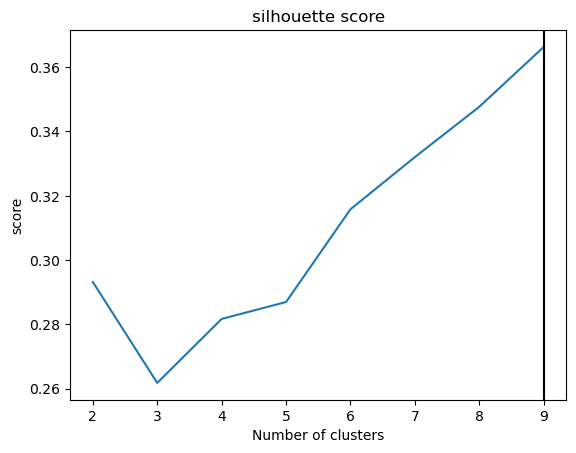

In [167]:
best_k, best_labels = evaluate_cluster_model(tsne_data, range_clusters=range(2,10), plot = True)

In [168]:
best_k

9

In [169]:
visualize_chosen_cluster_model(tsne_data, best_labels)